# CIFAR-10 을 이용한 CNN 구축

In [1]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16340531673853193903
 xla_global_id: -1]

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

### Data Load

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


### Data 시각화

In [5]:
cifa10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

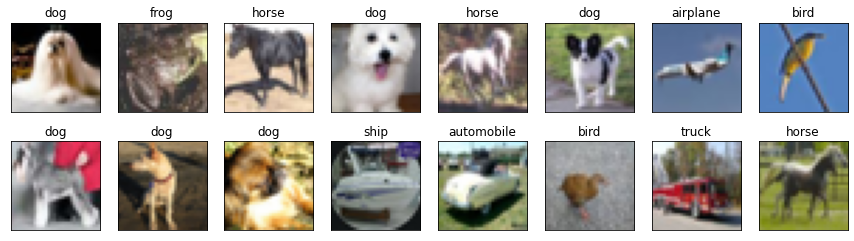

In [6]:
fig, axes = plt.subplots(2, 8, figsize=(15, 4))
axes = axes.ravel()
for i in range(16):
    idx = np.random.randint(0, len(y_train))
    axes[i].imshow(X_train[idx, :])
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title(cifa10_classes[y_train[idx, 0]])

### data normalization

In [7]:
X_train_scaled = X_train / 255.
X_test_scaled  = X_test / 255.

### one-hot encoding of class labels

In [8]:
y_train_onehot = utils.to_categorical(y_train)
y_test_onehot  = utils.to_categorical(y_test)
print(y_train_onehot.shape)
print(y_test_onehot.shape)

(50000, 10)
(10000, 10)


### Data Loader 생성

In [9]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train_onehot)).shuffle(10000).batch(64)
test_ds  = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test_onehot)).batch(64)

### model build

In [10]:
model = Sequential()

model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 activation (Activation)     (None, 32, 32, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 activation_1 (Activation)   (None, 16, 16, 32)        0         
                                                        

In [11]:
# model compile
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [12]:
model.fit(train_ds, epochs=5, validation_data=test_ds, verbose=1, shuffle=True)

Epoch 1/5
782/782 [==============================] - 41s 51ms/step - loss: 1.7105 - accuracy: 0.3690 - val_loss: 1.3603 - val_accuracy: 0.5112
Epoch 2/5
782/782 [==============================] - 34s 44ms/step - loss: 1.3767 - accuracy: 0.5011 - val_loss: 1.2654 - val_accuracy: 0.5523
Epoch 3/5
782/782 [==============================] - 27s 35ms/step - loss: 1.2365 - accuracy: 0.5581 - val_loss: 1.0521 - val_accuracy: 0.6234
Epoch 4/5
782/782 [==============================] - 37s 47ms/step - loss: 1.1525 - accuracy: 0.5888 - val_loss: 1.0599 - val_accuracy: 0.6313
Epoch 5/5
782/782 [==============================] - 35s 45ms/step - loss: 1.0841 - accuracy: 0.6130 - val_loss: 0.9459 - val_accuracy: 0.6678


In [13]:
model.evaluate(test_ds, verbose=0)

[0.9458538293838501, 0.6678000092506409]

In [14]:
y_pred = model.predict(X_test_scaled).argmax(axis=1)
print(y_pred.shape)
print(y_pred)

313/313 [==============================] - 2s 7ms/step
(10000,)
[5 8 8 ... 5 4 7]


In [15]:
y_true = y_test.ravel()
y_true

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

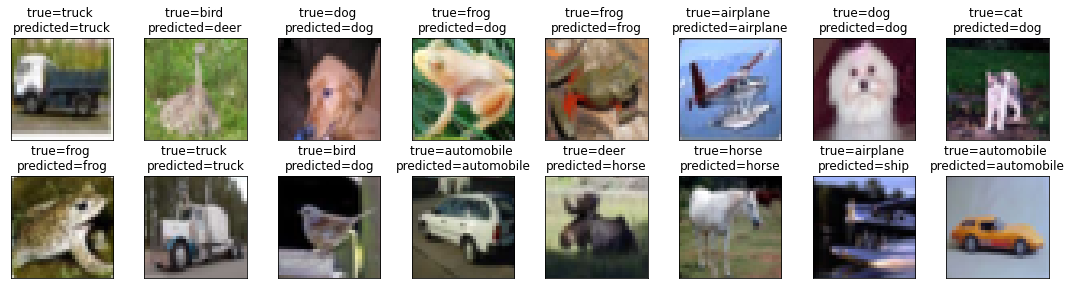

In [16]:
fig, axes = plt.subplots(2, 8, figsize=(15, 4))
axes = axes.ravel()
for i in range(16):
    idx = np.random.randint(0, len(y_test))
    axes[i].imshow(X_test[idx, :])
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title("true={} \npredicted={}".
                      format(cifa10_classes[y_true[idx]], cifa10_classes[y_pred[idx]]))
plt.tight_layout()

## accuracy 시각화

In [18]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[753,   9,  45,  15,  11,  10,   6,  10, 120,  21],
       [ 28, 772,   4,   7,   3,  10,  11,  10,  55, 100],
       [ 81,   5, 490,  38, 124, 106,  81,  38,  29,   8],
       [ 27,   4, 101, 263,  85, 349,  81,  38,  30,  22],
       [ 39,   3, 105,  23, 593,  56,  47, 110,  24,   0],
       [ 14,   1,  59,  70,  53, 694,  25,  60,  19,   5],
       [  9,   1,  50,  32,  75,  34, 768,  13,  16,   2],
       [ 15,   1,  48,  14,  67, 103,  10, 732,   5,   5],
       [ 56,  18,   8,   4,   7,  13,   4,   7, 870,  13],
       [ 52,  75,  10,   7,   6,  16,   8,  21,  62, 743]], dtype=int64)

### heatmap 작성

Test Accuracy : 0.6678


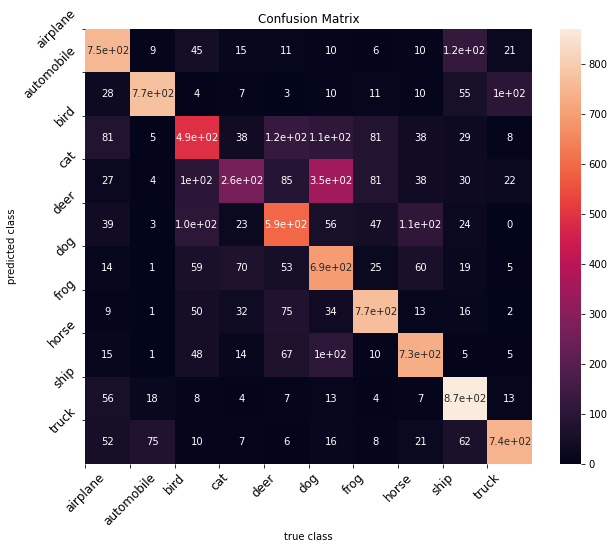

In [19]:
plt.figure(figsize=(10,8))

sns.heatmap(cm, annot=True)

plt.xticks(np.arange(10), cifa10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifa10_classes, rotation=45, fontsize=12)
plt.xlabel("true class")
plt.ylabel("predicted class")
plt.title('Confusion Matrix')
print('Test Accuracy :', accuracy_score(y_true, y_pred))

# 실습 :

## Convolutional Layer 와 Pooling Layer 를  추가하고 Hyper-parameter 조정하여 성능 개선 혹은 epochs 늘려서 accuracy 향상 비교